# LLMs Transfer Learning

### perform sentiment analysis on the IMDb dataset using a pre-trained model from Hugging Face.

Based on the documentation available at: https://huggingface.co

In [1]:
# Install necessary libriaries
# pip install transformers datasets torch accelerate evaluate

# Import necessary libriaries
from transformers import pipeline, AutoModelForSequenceClassification, AutoTokenizer, TrainingArguments, Trainer
from datasets import load_dataset, Dataset
from torch.utils.data import DataLoader
import evaluate
import re
import torch
import numpy as np
import warnings
warnings.filterwarnings("ignore")

## 1. Load the IMDb Dataset

In [2]:
from datasets import load_dataset

data = load_dataset('imdb')
data

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    unsupervised: Dataset({
        features: ['text', 'label'],
        num_rows: 50000
    })
})

## 2. Preprocess text

In [3]:
# Define a function to preprocess our messages
def preprocess_text(text):
    
    ## 1. Lowercase
    text = text.lower()
    
    ## 2. Remove HTML tags
    text = re.sub("<.*?>"," ", text)

    ## 3. Replace contractions with full words
    text = re.sub(r"\'m", " am", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"won't", "will not", text)
    text = re.sub(r"can\'t", "can not", text)
    text = re.sub(r"n\'t", " not", text)

    # Delete newline characters
    text = text.replace('\n', ' ')
    # Remove redundant spaces
    text = re.sub(r'\s+', ' ', text).strip()

    return text

In [4]:
# Implement text cleaning

data = data.map(lambda x: {'text': preprocess_text(x['text'])})

## 3. Select a Pre-Trained Model from Hugging Face
I choose `distilbert-base-uncased-finetuned-sst-2-english` pre-trained model for this project task, sentiment analysis.

## 4. Load raw Pre-trained Model

In [5]:
# Load pre-trained model and tokenizer from Hugging Face
model_name = "distilbert-base-uncased-finetuned-sst-2-english"

tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=2)

# Initialize pipeline for sentiment analysis (making Inferences)
sentiment_pipeline = pipeline(task='sentiment-analysis', model=model, tokenizer=tokenizer, truncation=True)   #,truncation=True

## 5. Prepare data

In [6]:
def tokenize_function(examples):
    return tokenizer(examples['text'], truncation=True)    #, padding="max_length"

# Tokenize dataset
tokenized_datasets = data.map(tokenize_function, batched=True)

In [7]:
# Split train_dataset into 80% to train and 20% to eval
test_dataset = tokenized_datasets["test"]
train_dataset = tokenized_datasets["train"].train_test_split(test_size=0.2)["train"]
eval_dataset = tokenized_datasets["train"].train_test_split(test_size=0.2)["test"]

## 6. Evaluate raw pre-trained model on our dataset

In [8]:
# Map predictions to numerical labels
def map_predictions_to_labels(pred_outputs):
    return [0 if pred['label'] == 'NEGATIVE' else 1 for pred in pred_outputs]

In [9]:
# Get predictions
pred_outputs = sentiment_pipeline(eval_dataset['text'])
                                  
# Convert predictions to numerical labels
pred_labels = map_predictions_to_labels(pred_outputs)

In [10]:
pred_labels

[0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,


In [11]:
# Get actual_labels
actual_labels = eval_dataset['label']

In [12]:
# Load accuracy metric
accuracy_metric = evaluate.load("accuracy")

In [13]:
# Calculate accuracy on evaluation set
accuracy_result = accuracy_metric.compute(predictions=pred_labels, references=actual_labels)
print(f"Accuracy of pre-trained model before fine-tuning: {accuracy_result}")

Accuracy of pre-trained model before fine-tuning: {'accuracy': 0.886}


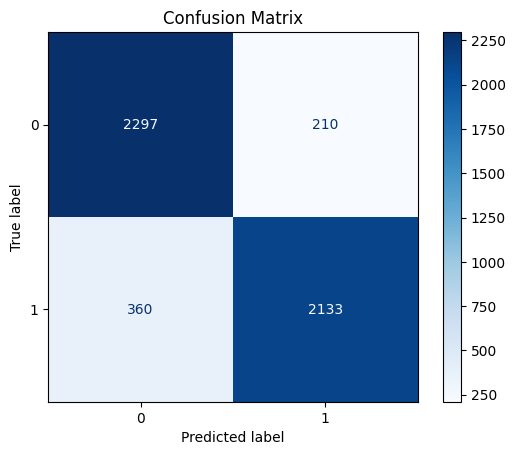

In [15]:
# Confusion Matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(actual_labels, pred_labels)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

***Comment***: 

- This Pre-trained LLM Model without Fine-tuning achieves an accuracy of 88.6% without any additional training on the IMDb dataset. This performance is slightly better than the Logistic Regression model (88%) and significantly better than the XGBoost model (84%) in notebook 1. This demonstrates the power of pre-trained LLMs in understanding and analyzing text due to their extensive training on diverse datasets.

- However, without fine-tuning, the model may not be perfectly adapted to the specific nuances of the IMDb dataset.

## _________
## 7. Enhancing Model Using Transfer Learning
## Fine-tune pre-trained model on the project dataset

### Define training arguments and train the model:

In [16]:
# Create TrainingArguments
repo_name = './my_fine-tuned_model'
training_args = TrainingArguments(
                        output_dir=repo_name,
                        push_to_hub=False,
                        evaluation_strategy="epoch",
                        save_strategy="epoch",
                        learning_rate=2e-5,
                        per_device_train_batch_size=16,
                        per_device_eval_batch_size=16,
                        num_train_epochs=3,
                        weight_decay=0.01,
                        logging_steps=100,
                        warmup_steps=100,
                        load_best_model_at_end=True,
)

# Create a batch of examples
from transformers import DataCollatorWithPadding
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)
# data_collator = DataCollatorWithPadding(tokenizer=tokenizer, return_tensors="tf")

# Load accuracy metric
accuracy_metric = evaluate.load("accuracy")

# Generate evalution function
def compute_metrics(eval_pred):
    output_labels, actual_labels = eval_pred
    predictions = np.argmax(output_labels, axis=1)   #prediction is the highest output probability
    return accuracy_metric.compute(predictions=predictions, references=actual_labels)

In [17]:
# Build Trainer
trainer = Trainer(
                model=model,
                args=training_args,
                train_dataset=train_dataset,
                eval_dataset=eval_dataset,
                tokenizer=tokenizer,
                data_collator=data_collator,
                compute_metrics=compute_metrics,
)

# Train model
train_result =  trainer.train()
train_result

Epoch,Training Loss,Validation Loss,Accuracy
1,0.217200,0.139244,0.953000
2,0.141600,0.104793,0.970000
3,0.091300,0.106377,0.976000


TrainOutput(global_step=3750, training_loss=0.15587989616394043, metrics={'train_runtime': 58501.962, 'train_samples_per_second': 1.026, 'train_steps_per_second': 0.064, 'total_flos': 7826289821570304.0, 'train_loss': 0.15587989616394043, 'epoch': 3.0})

In [18]:
# Evaluate fine-tuned model
trainer.evaluate()

{'eval_loss': 0.104793481528759,
 'eval_accuracy': 0.97,
 'eval_runtime': 1944.5635,
 'eval_samples_per_second': 2.571,
 'eval_steps_per_second': 0.161,
 'epoch': 3.0}

In [19]:
# Manually Evaluate

# Get predictions
pred_outputs = sentiment_pipeline(eval_dataset['text'], truncation=True)
# Convert predictions to numerical labels
pred_labels = map_predictions_to_labels(pred_outputs)

# Get actual_labels
actual_labels = eval_dataset['label']

# Load accuracy metric
accuracy_metric = evaluate.load("accuracy")
# Calculate accuracy on evaluation set
accuracy_result = accuracy_metric.compute(predictions=pred_labels, references=actual_labels)
print(f"Accuracy of pre-trained model before fine-tuning: {accuracy_result}")

Accuracy of pre-trained model before fine-tuning: {'accuracy': 0.97}


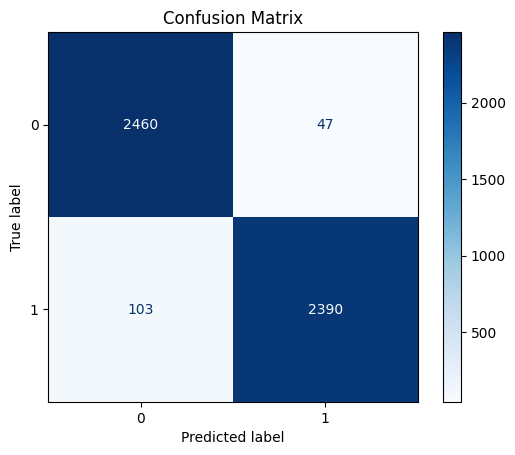

In [20]:
# Confusion Matrix
predictions = trainer.predict(eval_dataset)
pred_labels = np.argmax(predictions.predictions, axis=1)
true_labels = predictions.label_ids

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(true_labels, pred_labels)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

***Comment***:
- Fine-tuning the pre-trained LLM on the IMDb dataset leads to a substantial increase in accuracy, achieving 97%. This is a considerable improvement over both the non-fine-tuned model and the classical models.
- The fine-tuning process allows the model to learn specific patterns, idiomatic expressions, and contextual cues relevant to the IMDb reviews, which enhances its predictive power.
- However, fine-tuning a large pre-trained LLM requires significant computational resources, including powerful hardware and extended training time. --> Computational Cost.

In [21]:
# Save model
model.save_pretrained('./fine-tuned-model')
tokenizer.save_pretrained('./fine-tuned-tokenizer')

('./fine-tuned-tokenizer\\tokenizer_config.json',
 './fine-tuned-tokenizer\\special_tokens_map.json',
 './fine-tuned-tokenizer\\vocab.txt',
 './fine-tuned-tokenizer\\added_tokens.json',
 './fine-tuned-tokenizer\\tokenizer.json')

## 8. Use fine-tuned model for Inference

In [22]:
# Initialize the pipeline with the fine-tuned model
from transformers import pipeline
sentiment_pipeline = pipeline(task='sentiment-analysis', model='./fine-tuned-model', tokenizer='./fine-tuned-tokenizer')

### Make Predictions on New Text

In [23]:
new_data = ["I loved this movie!", 
            "The movie was okay, but I wouldn't watch it again.", 
            "I didn't like the movie at all.",
            "This was a masterpiece. Not completely faithful to the books, but enthralling from beginning to end. Might be my favorite of the three."]

# Get predictions
predictions = sentiment_pipeline(new_data)
predictions

[{'label': 'POSITIVE', 'score': 0.9993304014205933},
 {'label': 'NEGATIVE', 'score': 0.9855459928512573},
 {'label': 'NEGATIVE', 'score': 0.9962347149848938},
 {'label': 'POSITIVE', 'score': 0.9971663355827332}]

In [24]:
# Display predictions
for text, prediction in zip(new_data, predictions):
    print(f"Text: {text}")
    print(f"Predicted sentiment: {prediction['label']}, Confidence: {prediction['score']}\n")

Text: I loved this movie!
Predicted sentiment: POSITIVE, Confidence: 0.9993304014205933

Text: The movie was okay, but I wouldn't watch it again.
Predicted sentiment: NEGATIVE, Confidence: 0.9855459928512573

Text: I didn't like the movie at all.
Predicted sentiment: NEGATIVE, Confidence: 0.9962347149848938

Text: This was a masterpiece. Not completely faithful to the books, but enthralling from beginning to end. Might be my favorite of the three.
Predicted sentiment: POSITIVE, Confidence: 0.9971663355827332



### Make Predictions on small unseen Test set

In [25]:
sample_test = data['test']['text'][:10]  # Let's take the first 10 reviews from the test set
predictions = sentiment_pipeline(sample_test)
predictions

[{'label': 'NEGATIVE', 'score': 0.9973191618919373},
 {'label': 'NEGATIVE', 'score': 0.9771757125854492},
 {'label': 'NEGATIVE', 'score': 0.9989737272262573},
 {'label': 'NEGATIVE', 'score': 0.9986228942871094},
 {'label': 'POSITIVE', 'score': 0.992683470249176},
 {'label': 'NEGATIVE', 'score': 0.9974231719970703},
 {'label': 'NEGATIVE', 'score': 0.9883129000663757},
 {'label': 'NEGATIVE', 'score': 0.9987258315086365},
 {'label': 'NEGATIVE', 'score': 0.9981155395507812},
 {'label': 'NEGATIVE', 'score': 0.9992716908454895}]

In [26]:
# Display predictions
for text, prediction in zip(sample_test, predictions):
    print(f"Text: {text}")
    print(f"Predicted sentiment: {prediction['label']}, Confidence: {prediction['score']}\n")

Text: i love sci-fi and am willing to put up with a lot. sci-fi movies/tv are usually underfunded, under-appreciated and misunderstood. i tried to like this, i really did, but it is to good tv sci-fi as babylon 5 is to star trek (the original). silly prosthetics, cheap cardboard sets, stilted dialogues, cg that does not match the background, and painfully one-dimensional characters cannot be overcome with a isci-fi' setting. (i am sure there are those of you out there who think babylon 5 is good sci-fi tv. it is not. it is clichéd and uninspiring.) while us viewers might like emotion and character development, sci-fi is a genre that does not take itself seriously (cf. star trek). it may treat important issues, yet not as a serious philosophy. it is really difficult to care about the characters here as they are not simply foolish, just missing a spark of life. their actions and reactions are wooden and predictable, often painful to watch. the makers of earth know it is rubbish as they h

### Make Predictions on all unseen Test set

In [27]:
# Get predictions
pred_outputs = sentiment_pipeline(test_dataset['text'], truncation=True)
# Convert predictions to numerical labels
pred_labels = map_predictions_to_labels(pred_outputs)

# Get actual_labels
actual_labels = test_dataset['label']

# Load accuracy metric
accuracy_metric = evaluate.load("accuracy")
# Calculate accuracy on evaluation set
accuracy_result = accuracy_metric.compute(predictions=pred_labels, references=actual_labels)
print(f"Accuracy of pre-trained model before fine-tuning: {accuracy_result}")

Accuracy of pre-trained model before fine-tuning: {'accuracy': 0.92732}
